In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np 
import pickle
import PIL.Image

import matplotlib.image as mpimg
import skimage.io
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.transform import resize
import matplotlib.patches as mpatches
from skimage import data
import skimage
from skimage.transform import rotate

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
Xb1_tr = np.load('aug_data_split/Xb1_tr.npy')
Xb2_tr = np.load('aug_data_split/Xb2_tr.npy')
Y_tr = np.load('aug_data_split/Y_tr.npy')
A_tr = np.load('aug_data_split/A_tr.npy')
C_tr = np.load('aug_data_split/C_tr.npy')

Xb1_te = np.load('aug_data_split/Xb1_te.npy')
Xb2_te = np.load('aug_data_split/Xb2_te.npy')
Y_te = np.load('aug_data_split/Y_te.npy')
A_te = np.load('aug_data_split/A_te.npy')
C_te = np.load('aug_data_split/C_te.npy')

#Normalizing the pixel values in training and testing set 
#Feature mean
#Band1
mean_b1 = np.mean(Xb1_tr,axis=0).reshape(1,Xb1_tr.shape[1])
std_b1 = np.std(Xb1_tr,axis =0).reshape(1,Xb1_tr.shape[1])
# mean_b1 = np.mean(Xb1_tr,axis=1).reshape(Xb1_tr.shape[0],1)
# std_b1 = np.std(Xb1_tr,axis =1).reshape(Xb1_tr.shape[0],1)

Xb1_tr = (Xb1_tr - mean_b1)/std_b1
#Band2
mean_b2 = np.mean(Xb2_tr,axis=0).reshape(1,Xb2_tr.shape[1])
std_b2 = np.std(Xb2_tr,axis =0).reshape(1,Xb2_tr.shape[1])
# mean_b2 = np.mean(Xb2_tr,axis=1).reshape(Xb2_tr.shape[0],1)
# std_b2 = np.std(Xb2_tr,axis =1).reshape(Xb2_tr.shape[0],1)

Xb2_tr = (Xb2_tr - mean_b2)/std_b2

#Testing set 
Xb1_te = (Xb1_te-mean_b1)/std_b1
Xb2_te = (Xb2_te - mean_b2)/std_b2

print('Shapes: ')
print(Xb1_tr.shape)
print(Xb2_tr.shape)
print(Y_tr.shape)
print(A_tr.shape)
print(C_tr.shape)

print(Xb1_te.shape)
print(Xb2_te.shape)
print(Y_te.shape)
print(A_te.shape)
print(C_te.shape)

Shapes: 
(2887, 5625)
(2887, 5625)
(2887, 1)
(2887, 1)
(2887, 1)
(321, 5625)
(321, 5625)
(321, 1)
(321, 1)
(321, 1)


# Principal Component Analysis 

Band 1:

Computing Covariance Matrix...
Computing Eigen values and Eigen vectors...
Sorting Eigen Values...
Computing New Sorted Eigen Vector Matrix...
Plotting graphs...


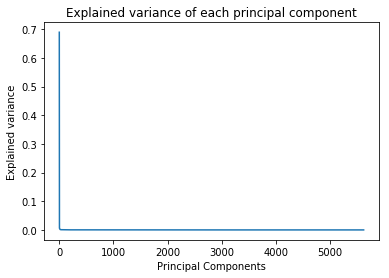

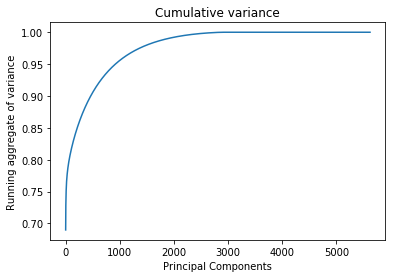


Band 2:

Computing Covariance Matrix...
Computing Eigen values and Eigen vectors...
Sorting Eigen Values...
Computing New Sorted Eigen Vector Matrix...
Plotting graphs...


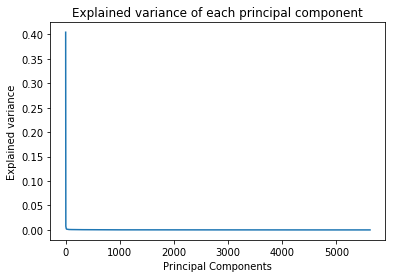

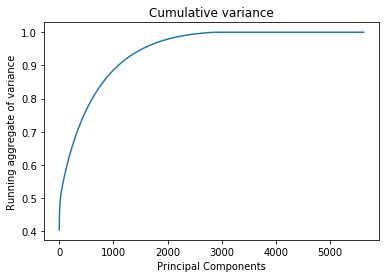


Band 1 + Band 2:

Computing Covariance Matrix...
Computing Eigen values and Eigen vectors...
Sorting Eigen Values...
Computing New Sorted Eigen Vector Matrix...
Plotting graphs...


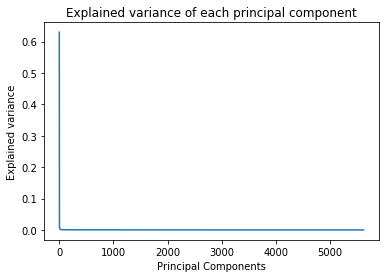

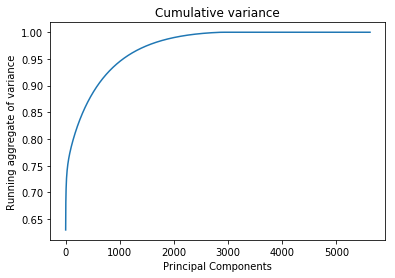

Number of principal components in band1:  225
Number of principal components in band2:  841
Number of principal components in band1 & band2 superimposed:  144


In [5]:
def explained_variance(X,retain_variance): 
    '''
    Input: 
            1. X - The original training feature matrix (samples in rows, predictors in columns)
            2. retain_variance - The percentage of variance (between 0 and 1) to be retained 
               in the final principal components 
          
    Output: 
            1. E - Sorted Eigen Vector Matrix
            2. n_principal_comp - Number of principal components to consider based on the amount
                                  of variance one wishes to retain
    '''
    
    #Covariance matrix S
    print('Computing Covariance Matrix...')
    S = np.cov(X, rowvar=False)
    
    #Eigen values and Eigen Vectors of covariance matrix X
    print('Computing Eigen values and Eigen vectors...')
    e_values, e_vector = np.linalg.eig(S)
    
    #Sorting eigen values from ascending to descending 
    print('Sorting Eigen Values...')
    sorted_evalues_ind = np.argsort(np.array(np.abs(e_values.real)))[::-1]
    
    #Sorting eigen vector matrix from highest to lowest eigen values
    print('Computing New Sorted Eigen Vector Matrix...')
    
    #New Matrix to store sorted eigen vector matrix
    E = np.zeros((S.shape[0],S.shape[1]))
    
    new_ind = 0 
    for i in sorted_evalues_ind:
        E[:,new_ind] = np.array(e_vector[:,i].real)
        new_ind+=1
    
    #Computing percent contribution of each principal component
    sorted_evalues = e_values[sorted_evalues_ind].reshape(1,S.shape[0])
   
    explained_var = sorted_evalues.real/np.sum(sorted_evalues.real)
    
    print('Plotting graphs...')
    
    #Plotting the variance contribution of each component in descending order
    plt.plot(explained_var.squeeze())
    plt.xlabel('Principal Components')
    plt.ylabel('Explained variance')
    plt.title('Explained variance of each principal component')
    plt.show()
    
    
    #Running aggregate of variance contribution
    cum_var = []
    agg = 0
 
    for exp_var in explained_var.squeeze(): 
        agg+=exp_var
        cum_var.append(agg)
    
    #Computing minimum number of principal components that hit the required variance to retain
    inde=0
    for a in cum_var:
        if (a >= retain_variance and int((inde+1)**0.5)==(inde+1)**0.5): 
            n_principal_comp = inde+1
            break
        inde+=1
              
    #Plotting cumulative variance contribution   
    plt.plot(cum_var)
    plt.xlabel('Principal Components')
    plt.ylabel('Running aggregate of variance')
    plt.title('Cumulative variance')
    plt.show()
    
    #Returning the sorted Eigen vector matrix and the number of principal components to consider 
    return E, n_principal_comp 


#Main 

print('Band 1:\n')
E_band1, n_band1 = explained_variance(Xb1_tr,retain_variance = 0.85)

print('\nBand 2:\n')
E_band2, n_band2 = explained_variance(Xb2_tr,retain_variance = 0.85)

print('\nBand 1 + Band 2:\n')
Xb1b2_tr = Xb1_tr + Xb2_tr
E_b1b2, n_b1b2 = explained_variance(Xb1b2_tr,retain_variance = 0.80)

print('Number of principal components in band1: ',n_band1)
print('Number of principal components in band2: ',n_band2)
print('Number of principal components in band1 & band2 superimposed: ',n_b1b2)

### Visualizing top 25 eigen basis vectors (basis image patches) for bands 1 and 2 eparately and for band 1 and 2 super-imposed images

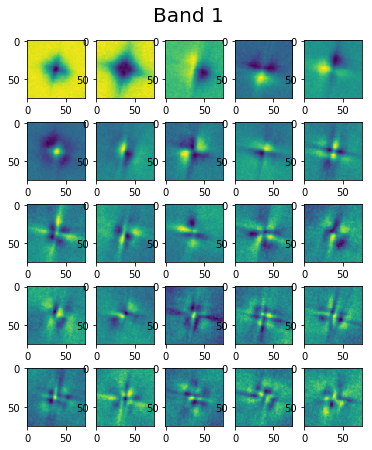

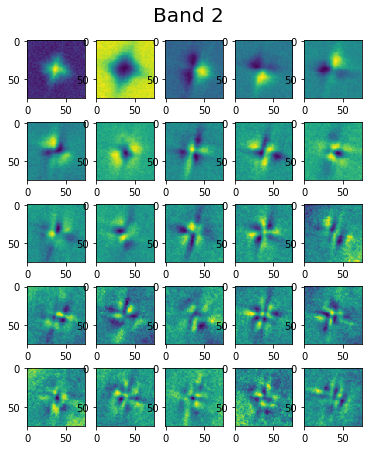

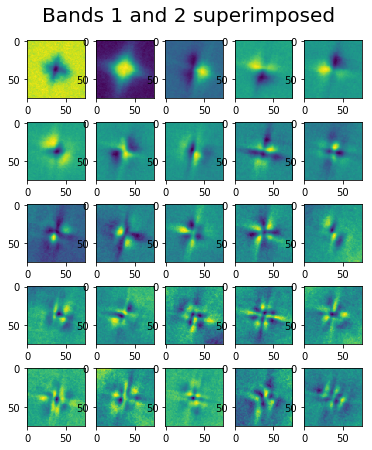

In [6]:
def plot_top_25(E_band1,E_band2,E_b1b2):
    
    '''
    Input: 
            1. E_band1 - Sorted Eigen Vector Matrix for band 1 
            2. E_band2 - Sorted Eigen Vector Matrix for band 2 
            3. E_b1b2 - Sorted Eigen Vector Matrix for bands 1 and 2 
    
    Output: 
            1. Top 25 Eigen basis vector visualizations
            
    '''
    
    fig, axes = plt.subplots(nrows=5, ncols=5)
    fig.suptitle('Band 1',size=20,x=0.5,y=1.6)
    plt. subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)
    i = 0
    for r in range(0,5):
        for c in range(0,5):
            axes[r,c].imshow(E_band1[:,i].reshape(75,75))
            i+=1
    
    plt.show()
    
    fig, axes = plt.subplots(nrows=5, ncols=5)
    fig.suptitle('Band 2',size=20,x=0.5,y=1.6)
    plt. subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)
    i = 0
    for r in range(0,5):
        for c in range(0,5):
            axes[r,c].imshow(E_band2[:,i].reshape(75,75))
            i+=1
    
    plt.show()
    
    fig, axes = plt.subplots(nrows=5, ncols=5)
    fig.suptitle('Bands 1 and 2 superimposed',size=20,x=0.5,y=1.6)
    plt. subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)
    i = 0
    for r in range(0,5):
        for c in range(0,5):
            axes[r,c].imshow(E_b1b2[:,i].reshape(75,75))
            i+=1
    
    plt.show()
    
plot_top_25(E_band1,E_band2,E_b1b2)

In [7]:
def dimensionality_reduction(X,E,n_comp):
    '''
    Input:
            1. X - The original feature matrix 
            2. E - The sorted Eigen vector matrix 
            3. n_comp - Number of dimensions in the reduced space to retain a given amount of variance
            
    Output: 
            1. X_new - The reduced feature matrix 
            2. E_new - reduced eigen vector matrix with 'n_comp' eigen vectors
    '''
    
    E_new = E[:,0:n_comp]
    X_new = np.dot(X,E_new)
    print('Shape of reduced feature matrix: ',X_new.shape)
    return(X_new,E_new)

#Training set band 1 and 2 seprately
X_red_band1_tr, E_red_band1 = dimensionality_reduction(Xb1_tr,E_band1,n_band1)
X_red_band2_tr, E_red_band2 = dimensionality_reduction(Xb2_tr,E_band2,n_band2)

#Testing set band 1 and 2 separately
X_red_band1_te, E_red_band1 = dimensionality_reduction(Xb1_te,E_band1,n_band1)
X_red_band2_te, E_red_band2 = dimensionality_reduction(Xb2_te,E_band2,n_band2)

#Training set bands 1 and 2 combined 
X_red_b1b2_tr, E_red_b1b2 = dimensionality_reduction(Xb1b2_tr,E_b1b2,n_b1b2)

#Testing set bands 1 and 2 combined 
#Combining bands 1 and 2 testing sets
Xb1b2_te = Xb1_te + Xb2_te
X_red_b1b2_te, E_red_b1b2 = dimensionality_reduction(Xb1b2_te,E_b1b2,n_b1b2)

Shape of reduced feature matrix:  (2887, 225)
Shape of reduced feature matrix:  (2887, 841)
Shape of reduced feature matrix:  (321, 225)
Shape of reduced feature matrix:  (321, 841)
Shape of reduced feature matrix:  (2887, 144)
Shape of reduced feature matrix:  (321, 144)


In [9]:
def pca_reconstruction(X,E):
    '''
    Input: 
            1. X - Original mean centered feature matrix
            2. E - Reduced Eigen vector matrix with 'n' highest eigen vectors
    
    Output: 
            1. X_hat - Reconstructed feature matrix
    '''

    X_hat = np.dot(X,np.dot(E,E.T))
    return X_hat

Xhat_band1_tr = pca_reconstruction(Xb1_tr,E_red_band1)
Xhat_band2_tr = pca_reconstruction(Xb2_tr,E_red_band2)
Xhat_b1b2_tr = pca_reconstruction(Xb1b2_tr,E_red_b1b2)

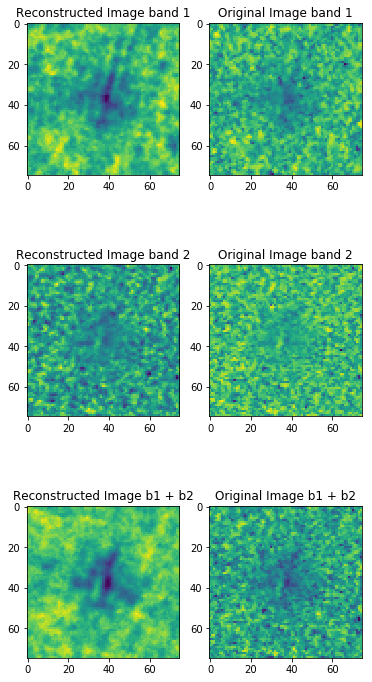

In [10]:
#Visualizing reconstructed and original images of band 1 and 2 in the training set

#Choosing random training sample
ch = np.random.randint(Xhat_band1_tr.shape[0])

fig, axes = plt.subplots(nrows=3, ncols=2)
plt. subplots_adjust(left=None, bottom=None, right=None, top=2.5, wspace=None, hspace=None)

#Band 1
axes[0,0].imshow(Xhat_band1_tr[ch].reshape(75,75))
axes[0,0].set_title('Reconstructed Image band 1')

axes[0,1].imshow(Xb1_tr[ch].reshape(75,75))
axes[0,1].set_title('Original Image band 1')

#Band 2
axes[1,0].imshow(Xhat_band2_tr[ch].reshape(75,75))
axes[1,0].set_title('Reconstructed Image band 2')

axes[1,1].imshow(Xb2_tr[ch].reshape(75,75))
axes[1,1].set_title('Original Image band 2')

#Band 1 + Band 2 
axes[2,0].imshow(Xhat_b1b2_tr[ch].reshape(75,75))
axes[2,0].set_title('Reconstructed Image b1 + b2')

axes[2,1].imshow(Xb1b2_tr[ch].reshape(75,75))
axes[2,1].set_title('Original Image b1 + b2')

plt.show()

In [11]:
SNR_b1 = 0 
for ch in range(0,Xhat_band1_tr.shape[0]):
    original = Xb1_tr[ch]
    noise = Xb1_tr[ch] - Xhat_band1_tr[ch]

    SNR_b1 +=10*np.log10(np.abs(np.mean(original))/np.abs(np.mean(noise)))

SNR_avg_b1 = SNR_b1/Xhat_band1_tr.shape[0]
print('Average SNR in the training set for band 1: ',SNR_b1/Xhat_band1_tr.shape[0])

SNR_b2 = 0 
for ch in range(0,Xhat_band2_tr.shape[0]):
    original = Xb2_tr[ch]
    noise = Xb2_tr[ch] - Xhat_band2_tr[ch]

    SNR_b2 +=10*np.log10(np.abs(np.mean(original))/np.abs(np.mean(noise)))
    
SNR_avg_b2 = SNR_b2/Xhat_band2_tr.shape[0]
print('Average SNR in the training set for band 2: ',SNR_b2/Xhat_band2_tr.shape[0])


print('Average SNR of band 1 and band 2 separately: ', (SNR_avg_b1 + SNR_avg_b2)/2)

SNR_b1b2 = 0 
for ch in range(0,Xhat_b1b2_tr.shape[0]):
    original = Xb1b2_tr[ch]
    noise = Xb1b2_tr[ch] - Xhat_b1b2_tr[ch]

    SNR_b1b2 +=10*np.log10(np.abs(np.mean(original))/np.abs(np.mean(noise)))
    
SNR_avg_b1b2 = SNR_b1b2/Xhat_b1b2_tr.shape[0]
print('Average SNR in the training set for bands 1 and 2 super-imposed images: ',SNR_b1b2/Xhat_b1b2_tr.shape[0])

Average SNR in the training set for band 1:  40.7676064966
Average SNR in the training set for band 2:  38.0504322067
Average SNR of band 1 and band 2 separately:  39.4090193517
Average SNR in the training set for bands 1 and 2 super-imposed images:  39.0395422627


In [23]:
# Saving the reduced feature matrices

#Training
Xb1_tr = np.zeros((X_red_band1_tr.shape[0],int(X_red_band1_tr.shape[1]**0.5), int(X_red_band1_tr.shape[1]**0.5)))
Xb2_tr = np.zeros((X_red_band2_tr.shape[0],int(X_red_band2_tr.shape[1]**0.5), int(X_red_band2_tr.shape[1]**0.5)))
Xb1b2_tr = np.zeros((X_red_b1b2_tr.shape[0],int(X_red_b1b2_tr.shape[1]**0.5), int(X_red_b1b2_tr.shape[1]**0.5)))
for sample in range(0,Xb1_tr.shape[0]):
    Xb1_tr[sample] = X_red_band1_tr[sample].reshape(int(X_red_band1_tr.shape[1]**0.5), int(X_red_band1_tr.shape[1]**0.5))
    Xb2_tr[sample]=  X_red_band2_tr[sample].reshape(int(X_red_band2_tr.shape[1]**0.5), int(X_red_band2_tr.shape[1]**0.5))
    Xb1b2_tr[sample] =  X_red_b1b2_tr[sample].reshape(int(X_red_b1b2_tr.shape[1]**0.5), int(X_red_b1b2_tr.shape[1]**0.5))
    
#Testing
Xb1_te = np.zeros((X_red_band1_te.shape[0],int(X_red_band1_te.shape[1]**0.5), int(X_red_band1_te.shape[1]**0.5)))
Xb2_te = np.zeros((X_red_band2_te.shape[0],int(X_red_band2_te.shape[1]**0.5), int(X_red_band2_te.shape[1]**0.5)))
Xb1b2_te = np.zeros((X_red_b1b2_te.shape[0],int(X_red_b1b2_te.shape[1]**0.5), int(X_red_b1b2_te.shape[1]**0.5)))
for sample in range(0,Xb1_te.shape[0]):
    Xb1_te[sample] = X_red_band1_te[sample].reshape(int(X_red_band1_te.shape[1]**0.5), int(X_red_band1_te.shape[1]**0.5))
    Xb2_te[sample]=  X_red_band2_te[sample].reshape(int(X_red_band2_te.shape[1]**0.5), int(X_red_band2_te.shape[1]**0.5))
    Xb1b2_te[sample] =  X_red_b1b2_te[sample].reshape(int(X_red_b1b2_te.shape[1]**0.5), int(X_red_b1b2_te.shape[1]**0.5))
    
np.save('pca_data/X_red_band1_tr.npy',Xb1_tr)
np.save('pca_data/X_red_band2_tr.npy',Xb2_tr)
np.save('pca_data/X_red_b1b2_tr.npy',Xb1b2_tr)
np.save('pca_data/Y_tr.npy',Y_tr)

np.save('pca_data/X_red_band1_te.npy',Xb1_te)
np.save('pca_data/X_red_band2_te.npy',Xb2_te)
np.save('pca_data/X_red_b1b2_te.npy',Xb1b2_te)
np.save('pca_data/Y_te.npy',Y_te)